### Import packages 


In [1]:
import pandas as pd 
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [9]:
!pip list

Package                       Version
----------------------------- --------------
aiohappyeyeballs              2.4.0
aiohttp                       3.10.5
aiosignal                     1.3.1
alabaster                     1.0.0
arrow                         1.3.0
astroid                       3.2.4
asttokens                     2.4.1
atomicwrites                  1.4.1
attrs                         24.2.0
autopep8                      2.0.4
Babel                         2.14.0
backports.tarfile             1.0.0
bcrypt                        4.2.0
beautifulsoup4                4.12.3
binaryornot                   0.4.4
black                         24.8.0
bleach                        6.1.0
Bottleneck                    1.3.7
Brotli                        1.1.0
certifi                       2024.7.4
cffi                          1.17.0
chardet                       5.2.0
charset-normalizer            3.3.2
chemometrics                  0.4.0
chemotools                    0.1.5
click   

### Variables 

In [2]:
PROJ = 'M1 Task 1'
doc = 'impurities_24-1.csv'
categories = ['Day', 'Filtration', 'Surfactant', 'Sonication'] #Independent
response = 'response' #Dependent

### Dirs

In [3]:
cwd = os.getcwd()
print("Current cwd:", cwd)
cwd = cwd.replace("\\", "/")
projdir = cwd + '/Projects/' + PROJ + '/'
resultsdir = projdir + 'ANOVA/'

Current cwd: e:\Year_2_Semester_1\chemometrics\Exercises\M1


### Work folders 

In [4]:
folds = [projdir,resultsdir]
for fold in folds:
    if not os.path.exists(fold):
        os.makedirs(fold)

### Data

In [5]:
fil = projdir + doc 
df = pd.read_csv(fil, sep="\t")
print(df)

    day  filtration  surfactant  sonication  response
0     1          25          20          10       261
1     1          25          10           0       273
2     1          25          20           0       243
3     1          25          30           0       249
4     1          25          30          10       246
5     1          25          10          10       244
6     1          50          30           0       255
7     1          50          20          10       226
8     1          50          10          10       239
9     1          50          30          10       254
10    1          50          10           0       288
11    1          50          20           0       296
12    1          75          30          10       221
13    1          75          20          10       279
14    1          75          10           0       280
15    1          75          20           0       293
16    1          75          30           0       229
17    1          75         

### ANOVA

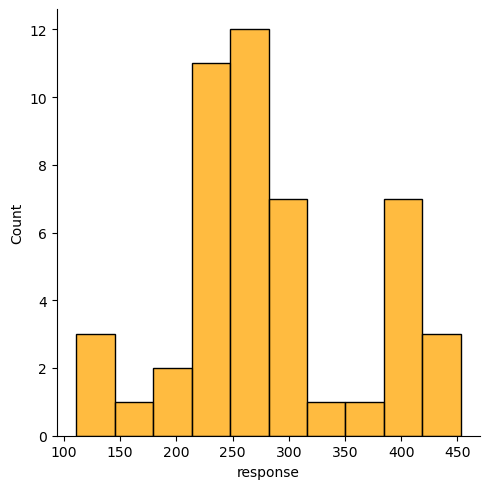

In [6]:
Bins = 10 
sns.displot(df['response'],color='orange',bins=Bins)

Text(0.5, 1.0, 'QQ Plot')

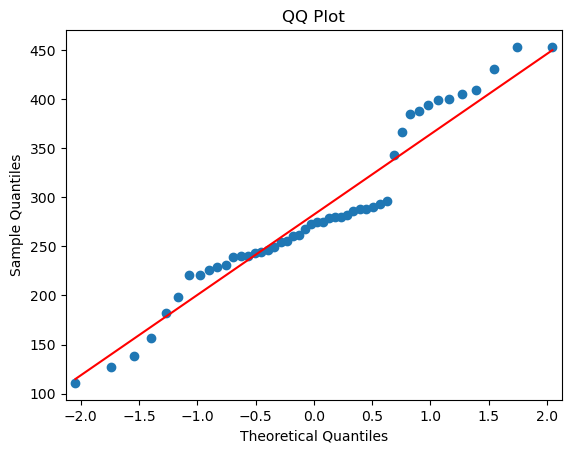

In [7]:
sm.qqplot(df['response'],line='s')
plt.title('QQ Plot')


In [8]:
mystring = 'response ~ (day + filtration + surfactant + sonication) ** 4'

model = ols(mystring, data = df).fit()
anova_table = sm.stats.anova_lm(model, typ =2)
print(anova_table)

                                             sum_sq    df           F  \
day                                    20049.187500   1.0   22.082680   
filtration                            153773.437500   1.0  169.369939   
surfactant                               136.125000   1.0    0.149932   
sonication                              2282.520834   1.0    2.514026   
day:filtration                        111931.204167   1.0  123.283849   
day:surfactant                           450.000000   1.0    0.495641   
day:sonication                            58.520833   1.0    0.064456   
filtration:surfactant                     78.400000   1.0    0.086352   
filtration:sonication                    270.937500   1.0    0.298417   
surfactant:sonication                     18.000000   1.0    0.019826   
day:filtration:surfactant                366.025000   1.0    0.403149   
day:filtration:sonication                  4.004167   1.0    0.004410   
day:surfactant:sonication               1378.125000